In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_regression

In [2]:
df = pd.read_csv('data/life_expectancy.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
df.rename(columns={'Life expectancy ' : 'Life expectancy', ' BMI ': 'BMI','Measles ':'Measles',
                   'under-five deaths ': 'under-five deaths', 'Diphtheria ':'Diphtheria',
                   ' HIV/AIDS': 'HIV/AIDS', ' thinness  1-19 years':'thinness  1-19 years',
                   ' thinness 5-9 years' : 'thinness 5-9 years'}, inplace=True);

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

In [8]:
columns = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio',
           'Total expenditure','Diphtheria','GDP','Population','thinness  1-19 years','thinness 5-9 years',
           'Income composition of resources','Schooling']
for column in columns:
    df[column] = imputer.fit_transform(df[[column]])

In [9]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.507640       124.080302     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    80.940461       0.000000   
50%       4.160000               64.912906    87.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2938.000000        2938.000000  2938.000000        2938.000000   
mean     38.321247          42.035739    82.550188           5.938190   
std      19.927677         160.445548    23.352143           2.400274   
min       1.000000           0.000000     3.000000           0.370000   
25%      19.400000           0.000000    78.000000           4.370000   
50%      43.000000           4.000000    93.000000           5.938190   
75%      56.100000          28.000000    97.000000           7.330000   
max      87.300000        2500.000000    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.640073     5.077785   13136.800417  5.381546e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    3116.561755  3.675929e+06   
75%      97.000000     0.800000    7483.158469  1.275338e+07   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2938.000000         2938.000000   
mean               4.839704            4.870317   
std                4.394535            4.482708   
min                0.100000            0.100000   
25%                1.600000            1.600000   
50%                3.400000            3.400000   
75%                7.100000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.627551    11.992793  
std                           0.204820     3.264381  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.662000    12.100000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

In [11]:
numeric_columns = ['Life expectancy', 'Adult Mortality',
                   'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                   'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                   'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                   'thinness  1-19 years', 'thinness 5-9 years',
                   'Income composition of resources', 'Schooling']

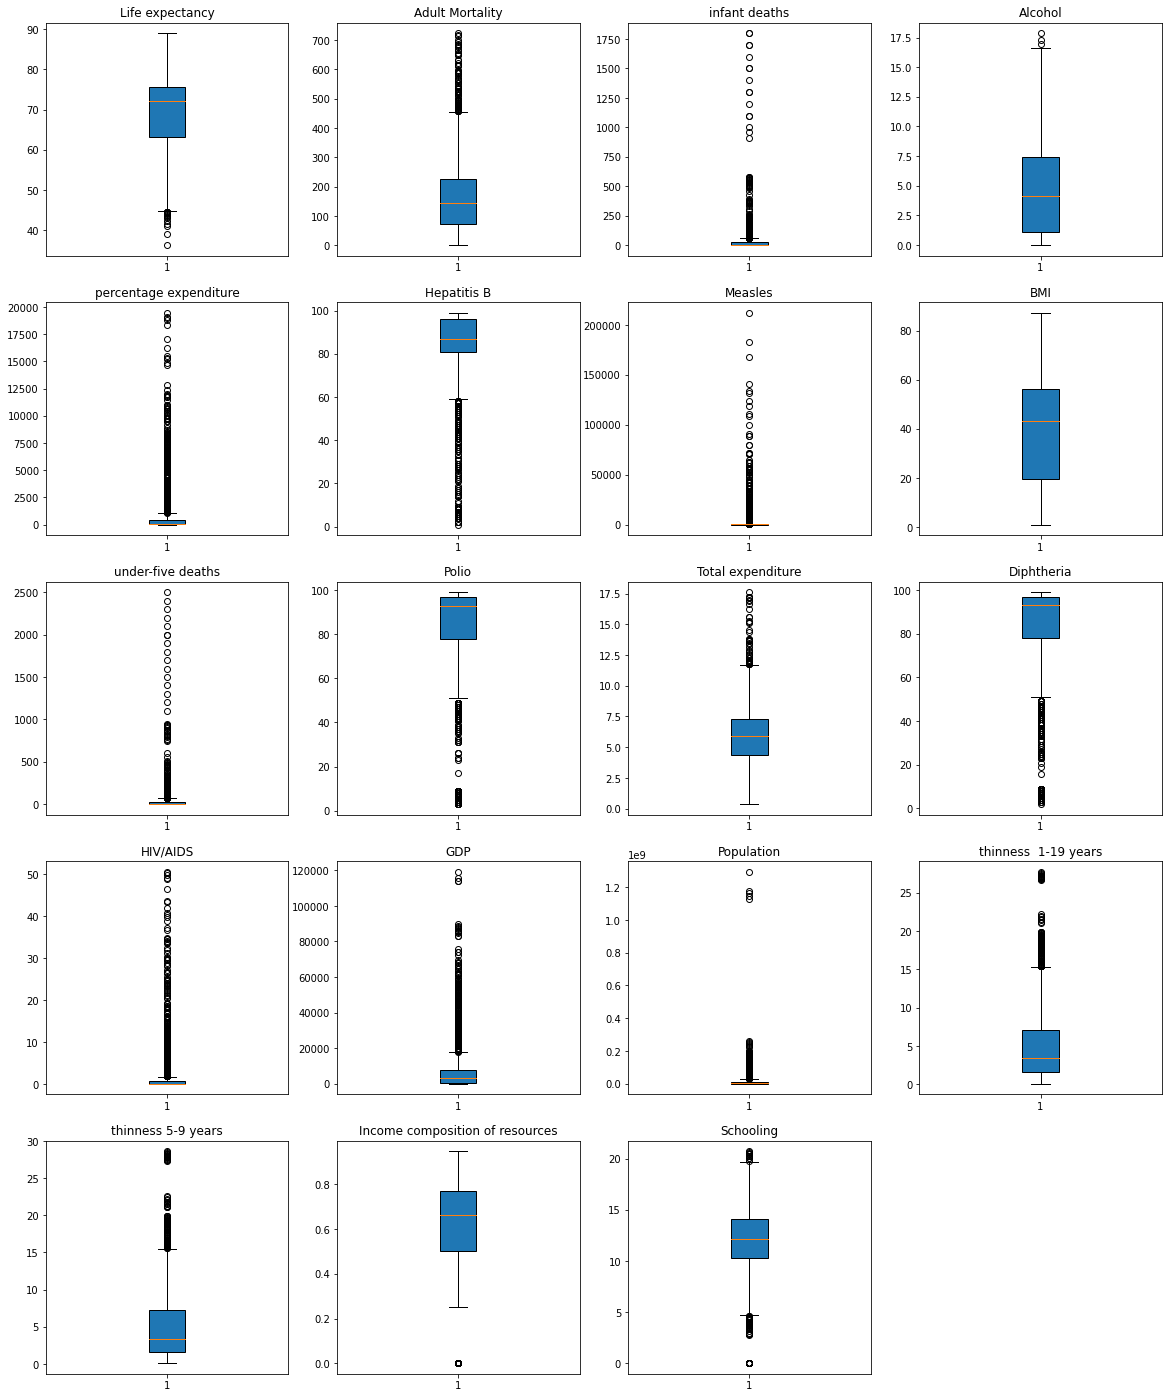

In [12]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in numeric_columns:
    plt.subplot(6,4,i)
    plt.boxplot(df[column], patch_artist=True)
    plt.title(column)
    i += 1

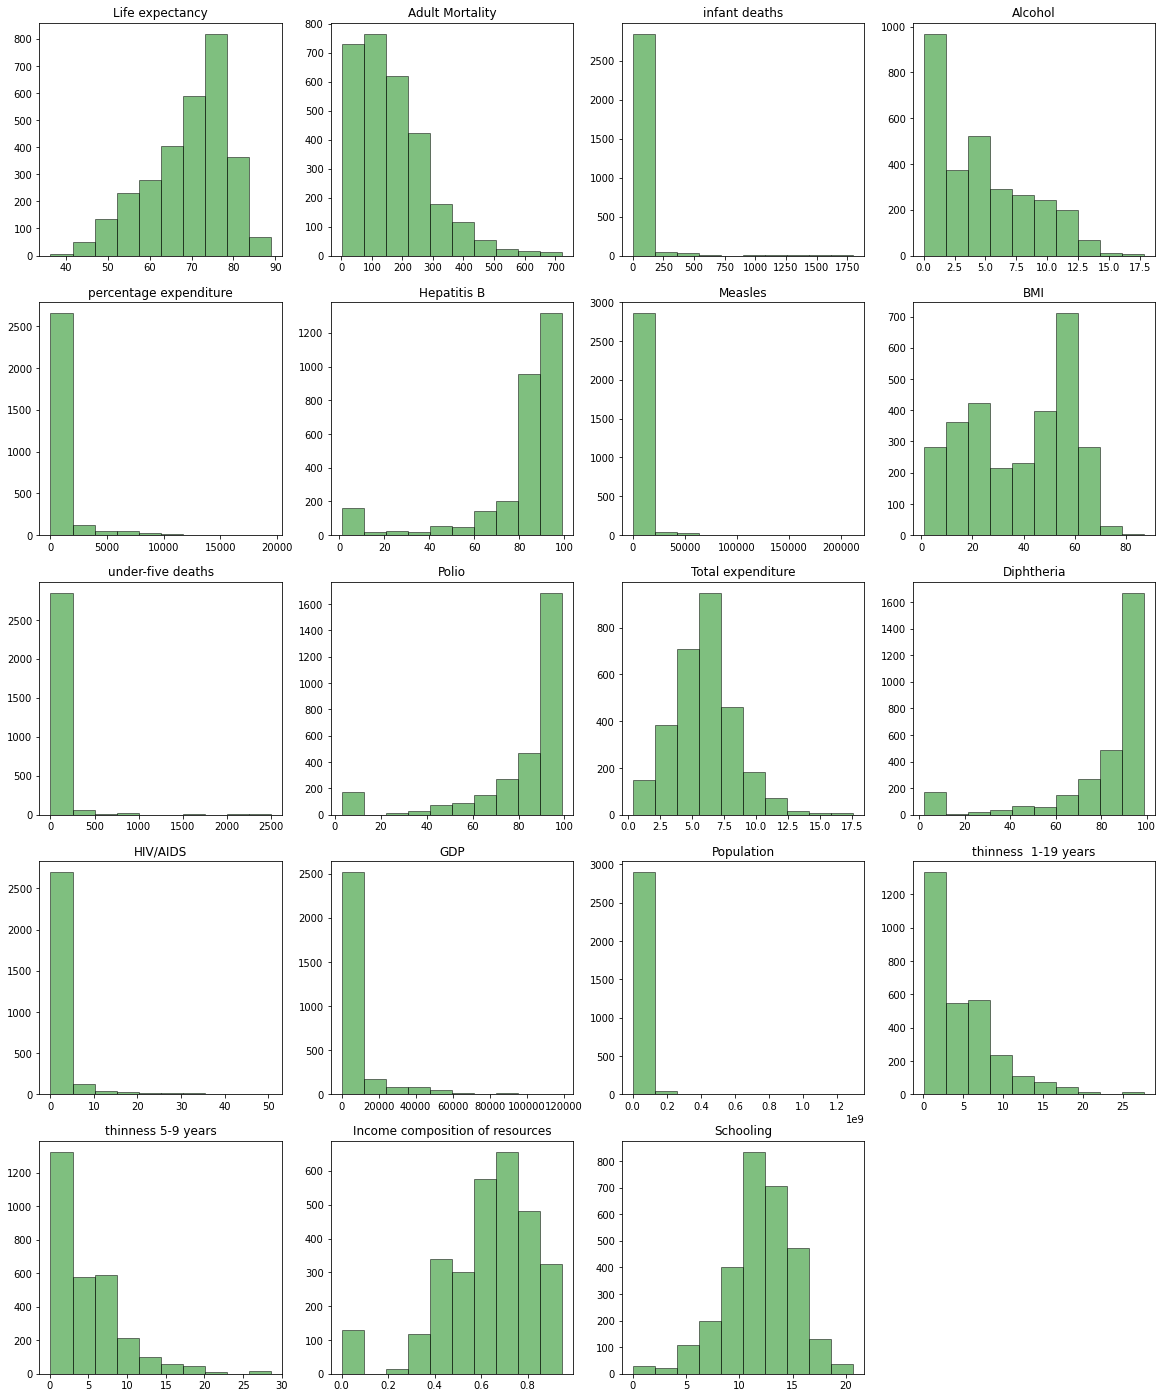

In [13]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in numeric_columns:
    plt.subplot(6,4,i)
    plt.hist(df[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

In [14]:
to_normelize = ['Adult Mortality',
                'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                'thinness  1-19 years', 'thinness 5-9 years',
                'Income composition of resources']

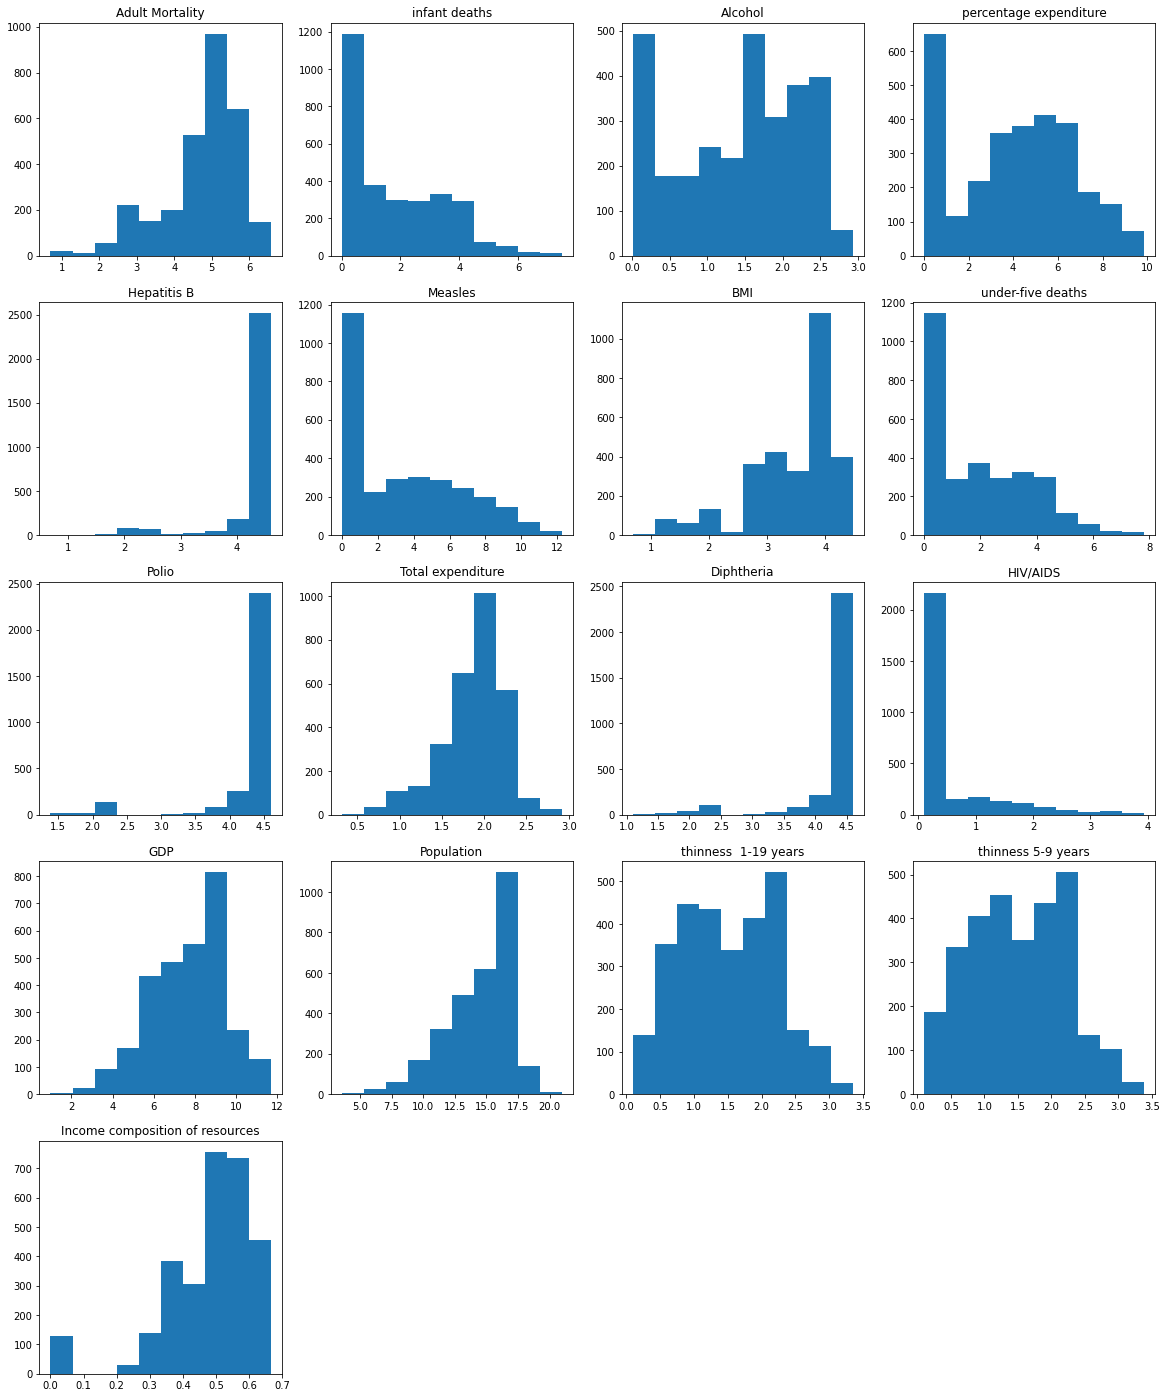

In [15]:
#Assess distribution of features
def log_normelize(data):
    plt.figure(figsize=(20,30))
    i = 1
    for column in to_normelize:
        plt.subplot(6,4,i)
        data[column] = np.log1p(data[column])
        plt.hist(data[column])
        plt.title(column)
        i += 1
log_normelize(df)

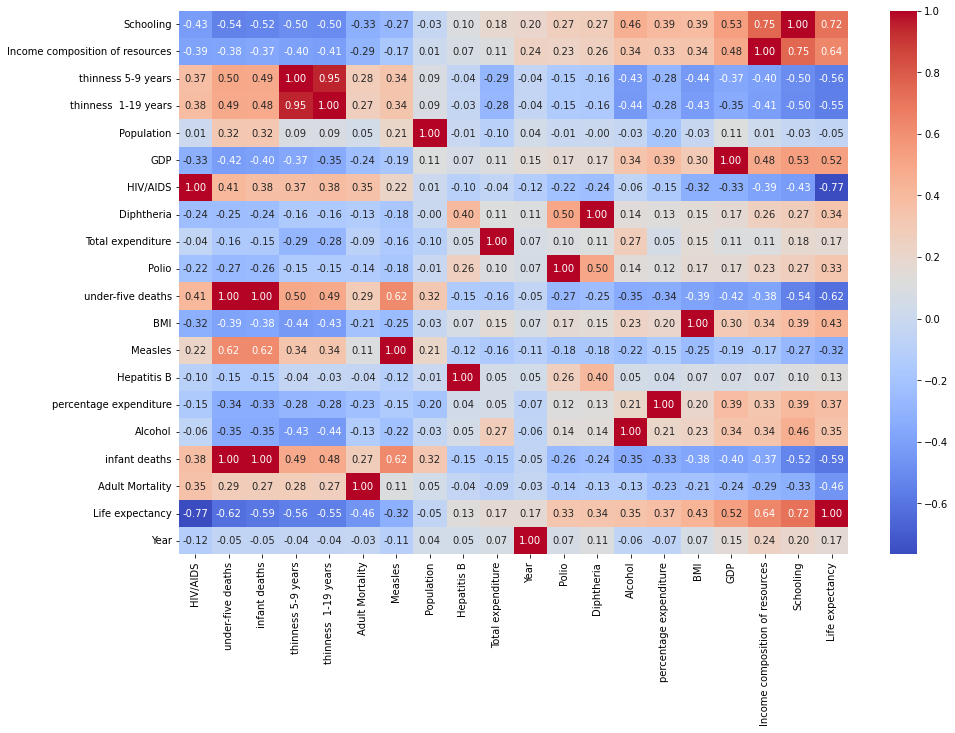

In [16]:
#Sorted heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().sort_values(by='Life expectancy').T[::-1],cmap='coolwarm',annot=True, fmt=".2f");

In [17]:
def feature_extraction(data):
    #UNIVARIATE SELECTION
    # Feature Extraction with Univariate Statistical Tests (f_regression)
    # load data
    X = data[numeric_columns].drop('Life expectancy',axis=1)
    y = data['Life expectancy']
    names=pd.DataFrame(X.columns)
    model = SelectKBest(score_func=f_regression, k=4)
    results = model.fit(X, y)
    
    results_df=pd.DataFrame(results.scores_)
    #Concat and name columns
    scored=pd.concat([names,results_df], axis=1)
    scored.columns = ["Feature", "Score"]
    scored.sort_values(by=['Score'],ascending=False)
    final_columns = scored[scored.Score > 0]
    df_sol = final_columns.sort_values(by=['Score'],ascending=False)

    return df_sol
feature_extraction(df)

Feature        Score
11                         HIV/AIDS  4166.033327
17                        Schooling  3072.020016
16  Income composition of resources  2043.282980
7                 under-five deaths  1834.790456
1                     infant deaths  1576.382694
15               thinness 5-9 years  1324.369007
14             thinness  1-19 years  1294.793190
12                              GDP  1113.218985
0                   Adult Mortality   775.062812
6                               BMI   659.857637
3            percentage expenditure   475.887596
2                           Alcohol   401.793510
10                       Diphtheria   394.389880
8                             Polio   351.059456
5                           Measles   345.173674
9                 Total expenditure    82.882572
4                       Hepatitis B    48.167795
13                       Population     7.598851

In [18]:
df.to_csv('data/final_life_expec.csv')

In [19]:
numeric_columns_2 = ['Life expectancy',
                     'Adult Mortality',
                     'infant deaths',
                     'Alcohol',
                     'percentage expenditure',
                     'Hepatitis B',
                     'Measles',
                     'BMI',
                     'under-five deaths',
                     'Polio',
                     'Status'] 

In [20]:
numeric_columns_1 = ['Total expenditure',
                     'Diphtheria',
                     'HIV/AIDS',
                     'GDP',
                     'Population',
                     'thinness  1-19 years',
                     'thinness 5-9 years',
                     'Income composition of resources',
                     'Schooling',
                     'Status']

In [21]:
features = df[numeric_columns_1]

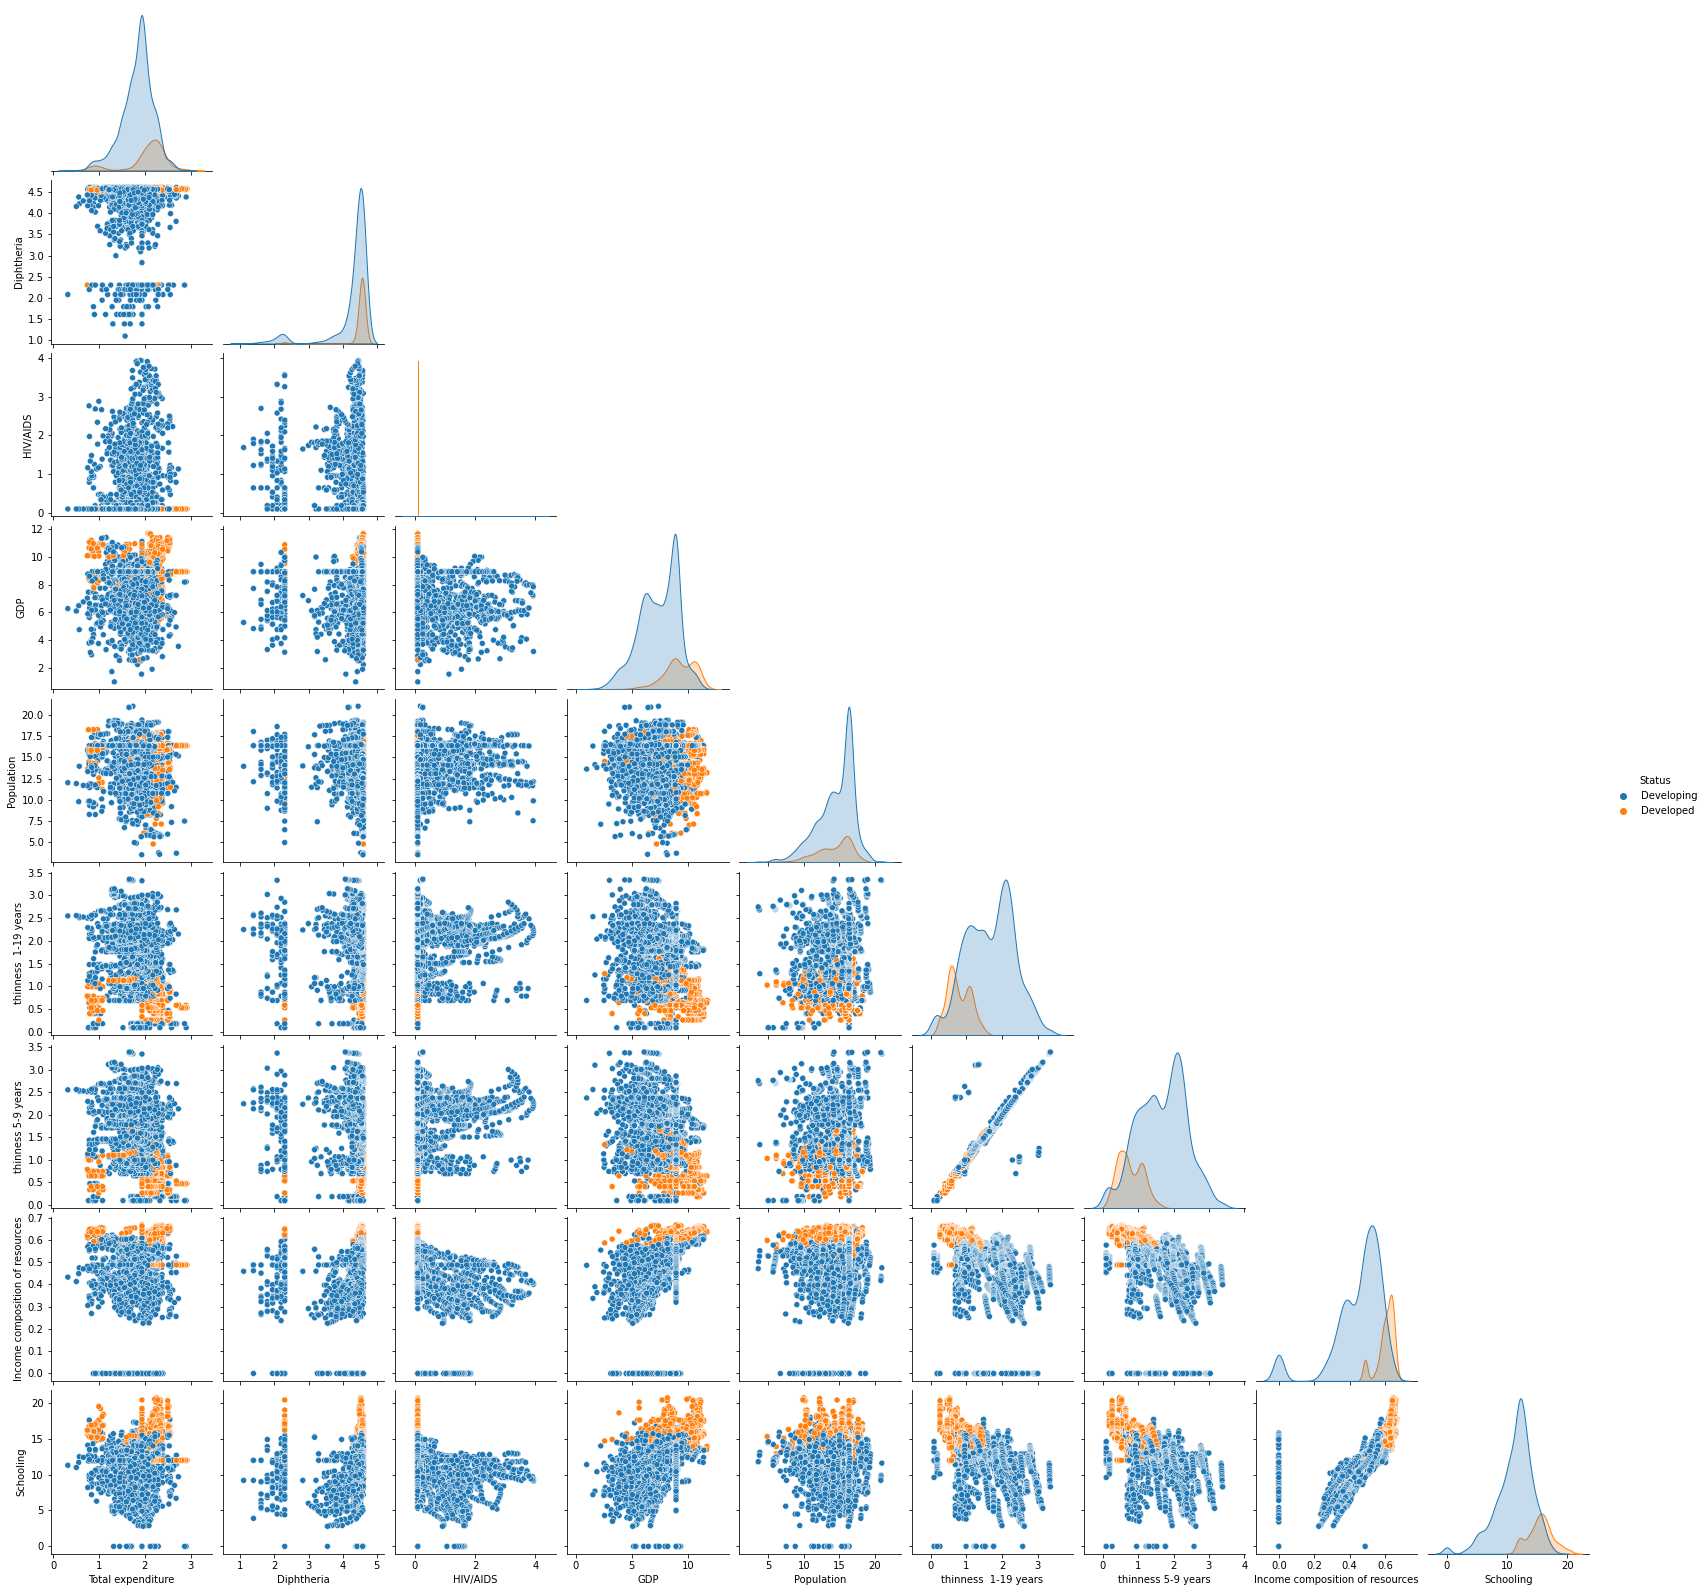

In [22]:
sns.pairplot(data=features, hue='Status',corner=True)

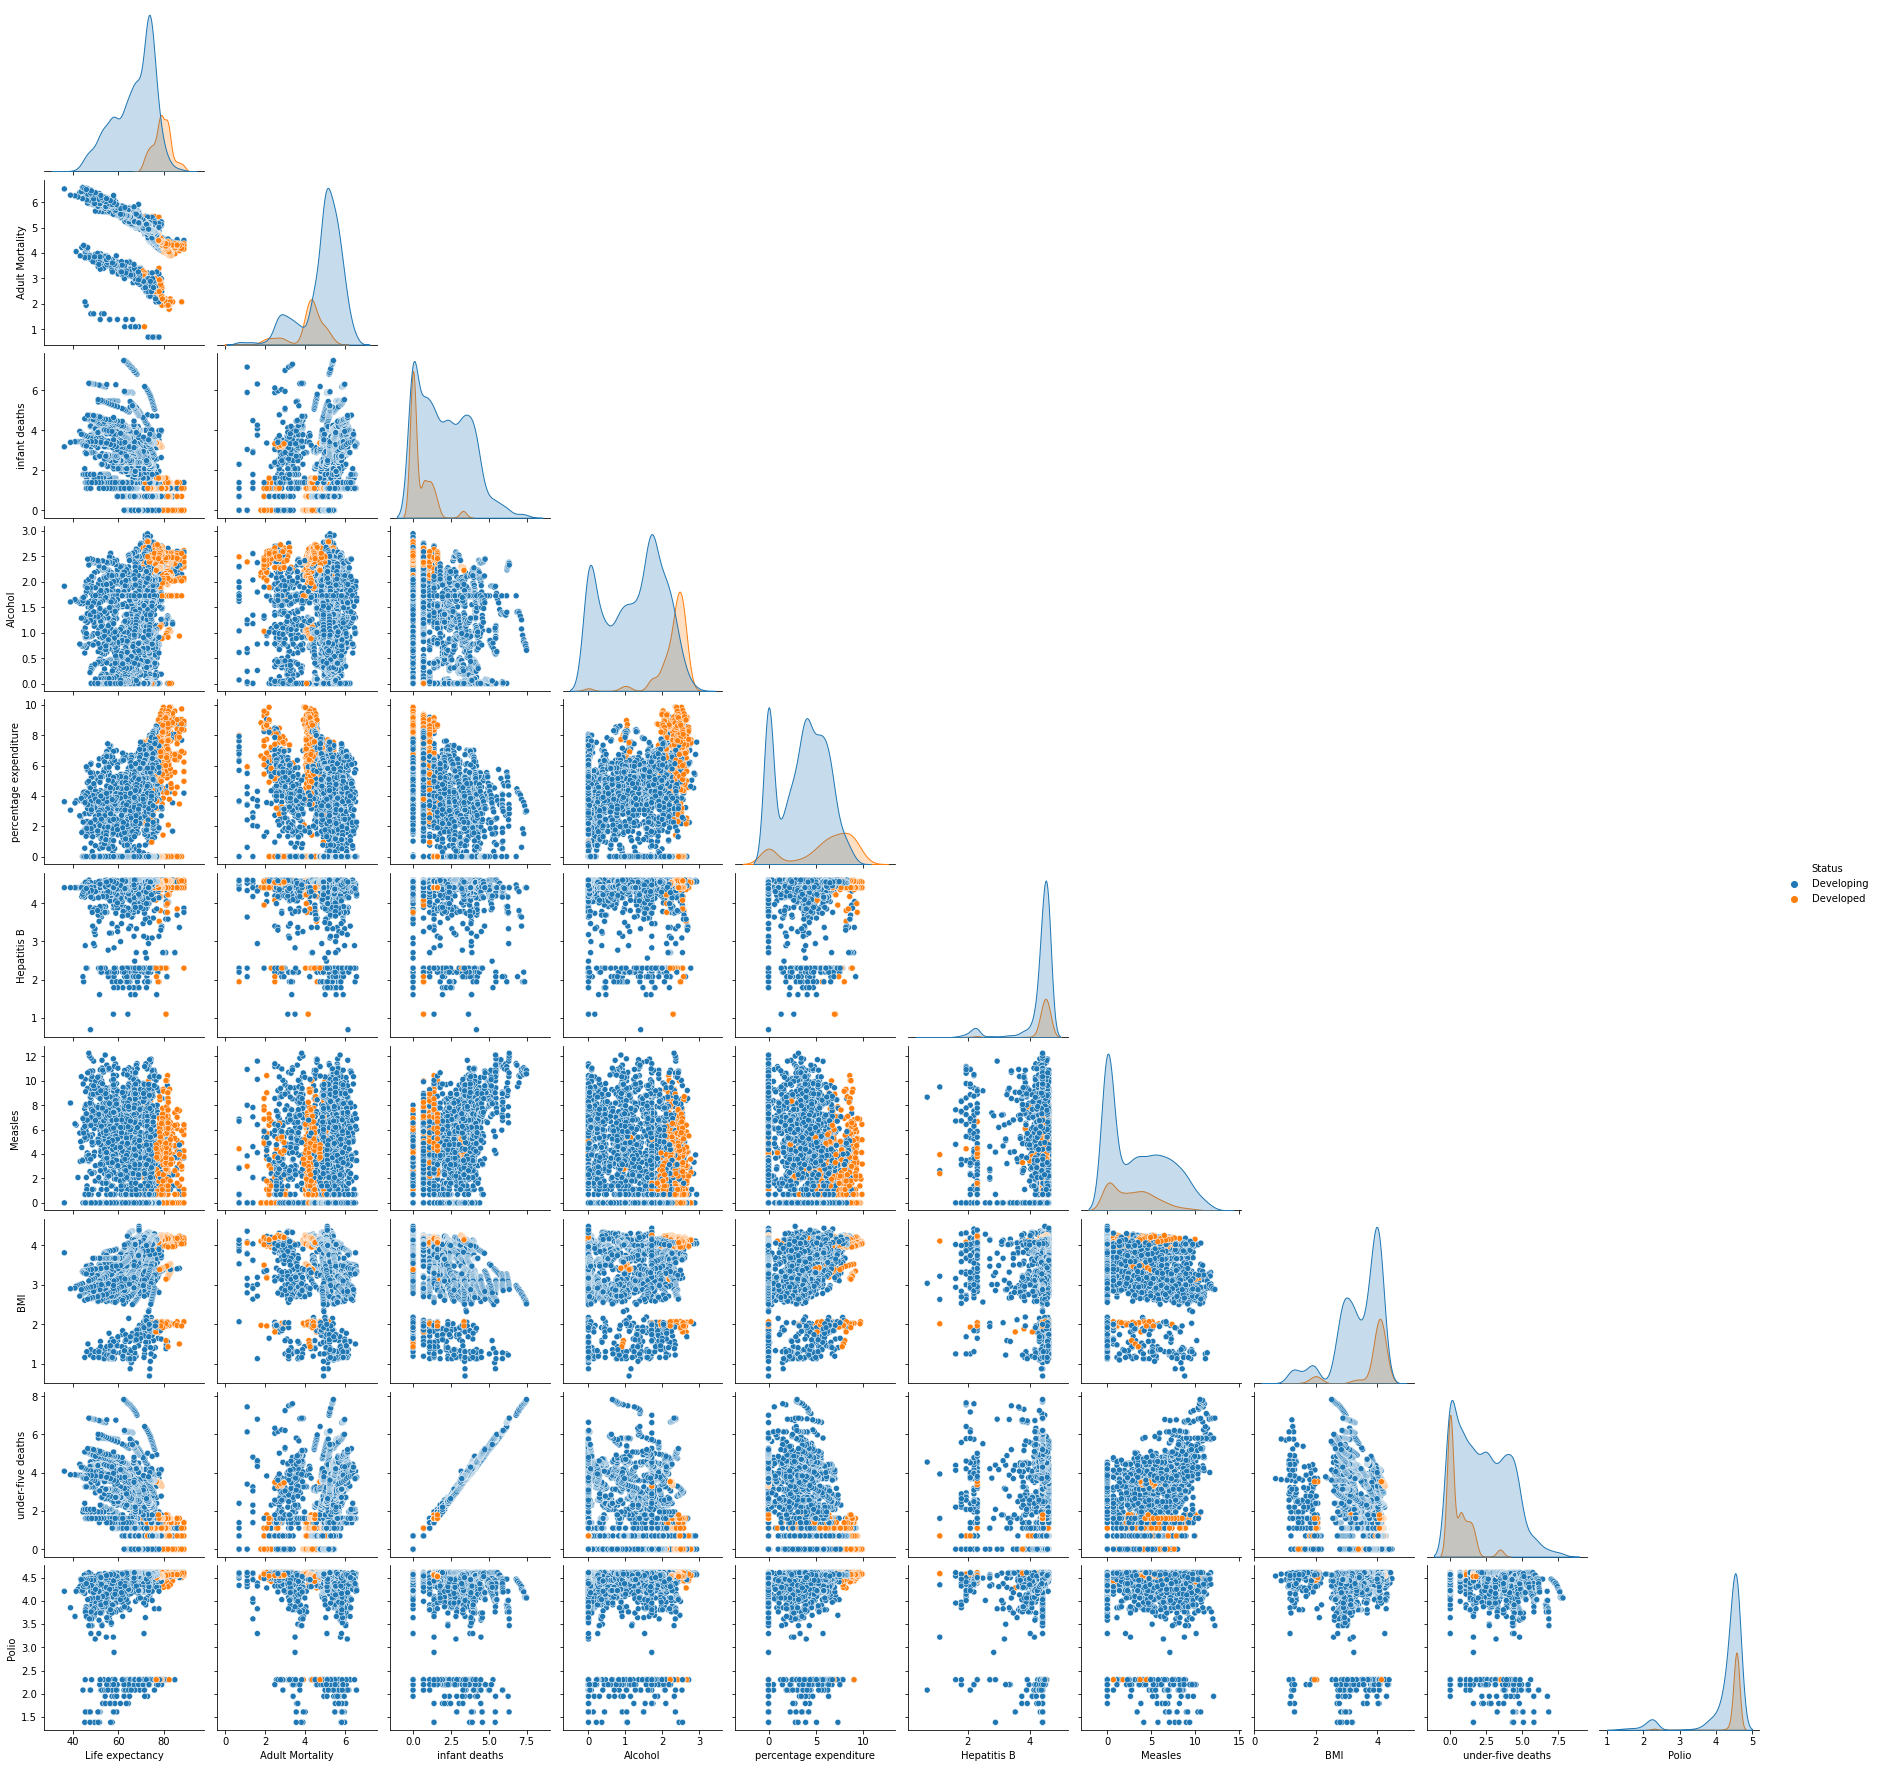

In [23]:
sns.pairplot(data=df[numeric_columns_2], hue='Status',corner=True)

In [24]:

import plotly.express as px
plt.figure(figsize=(10,8))
fig=px.histogram(df,x='Life expectancy',color='Status')
fig.show()

<Figure size 720x576 with 0 Axes>

In [25]:
plt.figure(figsize=(10,8))
fig=px.violin(df,x='Status',y='Life expectancy',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

<Figure size 720x576 with 0 Axes>

In [26]:
px.scatter_3d(df.sort_values(by='Year'),y='Schooling',x='HIV/AIDS',z='Life expectancy',
                                       template='plotly_dark',color='Status',size='Total expenditure')

In [27]:
px.scatter(df.sort_values(by='Year'),y='Life expectancy',
                                     x='Schooling',
                                     animation_frame='Year',
                                     animation_group='Country',
                                     template='plotly_dark',
                                     color='Country',
                                     size='Life expectancy',
                                     title='Life expectancy versus Schooling of countries in every year')

### CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score, mean_absolute_error 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from os.path import exists


In [2]:
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import pickle

In [13]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_regression

In [14]:
final_df = pd.read_csv('data/final_life_expec.csv')
final_df.drop('Unnamed: 0', axis=1, inplace=True)
final_df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0         5.575949   
1  Afghanistan  2014  Developing             59.9         5.605802   
2  Afghanistan  2013  Developing             59.9         5.594711   
3  Afghanistan  2012  Developing             59.5         5.609472   
4  Afghanistan  2011  Developing             59.2         5.620401   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B   Measles  ...  \
0       4.143135  0.00995                4.280542     4.189655  7.051856  ...   
1       4.174387  0.00995                4.311116     4.143135  6.200509  ...   
2       4.204693  0.00995                4.307023     4.174387  6.066108  ...   
3       4.248495  0.00995                4.371777     4.219508  7.933080  ...   
4       4.276666  0.00995                2.091507     4.234107  8.011023  ...   

      Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0  1.945910           2.214846    4.189655   0.09531  6.372055   17.334091   
1  4.077537           2.217027    4.143135   0.09531  6.419501   12.699497   
2  4.143135           2.211566    4.174387   0.09531  6.450067   17.272826   
3  4.219508           2.253395    4.219508   0.09531  6.508708   15.123021   
4  4.234107           2.182675    4.234107   0.09531  4.167242   14.906964   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0              2.901422            2.906901                         0.391366   
1              2.917771            2.917771                         0.389336   
2              2.928524            2.928524                         0.385262   
3              2.939162            2.944439                         0.380489   
4              2.954910            2.954910                         0.374318   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [15]:
numeric_columns = ['Life expectancy', 'Adult Mortality',
                   'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                   'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                   'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                   'thinness  1-19 years', 'thinness 5-9 years',
                   'Income composition of resources', 'Schooling']

In [16]:
X = final_df[numeric_columns].drop('Life expectancy', axis=1)
y = final_df['Life expectancy']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

#### Helper Functions

In [18]:
def bagging(model):
    bgRegressor = BaggingRegressor(base_estimator=model, 
                                     n_estimators = 500,
                                     max_samples = 0.25,
                                     bootstrap = True,
                                     random_state = 42)
    fit_predict_score(bgRegressor)

In [19]:
def bagging_oob(model):
    bgRegressor = BaggingRegressor(base_estimator=model, 
                                     n_estimators = 500,
                                     max_samples = 0.25,
                                     bootstrap = True,
                                     oob_score = True,
                                     random_state = 42)
    bgRegressor.fit(X_train, y_train)
    print(f"Score: {bgRegressor.oob_score_}") 

In [20]:
def random_subspaces(model):
    bgRegressor = BaggingRegressor(base_estimator=model, 
                                     n_estimators = 500,
                                     max_samples = 0.3,
                                     bootstrap = False,   
                                     max_features = 0.5,  
                                     bootstrap_features = True,
                                     random_state = 42)        
    fit_predict_score(bgRegressor)

In [21]:
def ada(model, lr):
    ada_reg = AdaBoostRegressor(model, 
                                n_estimators=500, 
                                learning_rate=lr)
    fit_predict_score(ada_reg)

### Creating Regressors models

In [22]:
class Reg_model:
    pass

In [23]:
def report_results(y_pred, y_train_pred):
    training_score = r2_score(y_train, y_train_pred)
    testing_score = r2_score(y_test, y_pred)
    print(f"training score: {training_score}")
    print(f"testing score= {testing_score}")
    print(f"Diff between train-test: {training_score-testing_score}")
    # Add the error as well later WIP
    return training_score, testing_score

In [24]:
def save_model(model):
    # save the model to disk
    filename = f'models/{model.__class__.__name__}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [25]:
def load_pickle(model_name):
    # load the model from file
    path = f"models/{model_name}.sav"
    loaded_model = pickle.load(open(path, 'rb'))
    return loaded_model

In [26]:
def search_and_fit(model, params):
    search = GridSearchCV(model(), params, scoring='r2', cv=10)
    search.fit(X_train, y_train)
    return model(**search.best_params_)

In [40]:
def fit_predict_score(model, params=None):
    model_name = str(model()).split('(')[0]
    path_to_file = f'models/{model_name}.sav'
    # Check if model exsist in models/<model_name>.sav
    if not exists(path_to_file):
        # Check if params was send, or a default model.
        print("No model were on file")
        if params:
            # Fit the new model 
            print("find best params")
            reg_model = search_and_fit(model, params)
        else:
            # No param were added, defauls settings
            print("No params were send")
            reg_model = model()       
    else:
        # load a saved model
        print("Loading a model from file")
        reg_model = load_pickle(model_name)
        print(f"model from pickle: {reg_model}")
    # Fit and Predict
    print("Done preprocessing prodecures -> Fit & Predict")
    reg_model.fit(X_train,y_train)
    trian_pred = reg_model.predict(X_train) 
    y_pred = reg_model.predict(X_test)
    # Save the new model 
    print("Saving new model to file .sav")
    save_model(reg_model)
    residuale(trian_pred, y_pred)
    return report_results(y_pred, trian_pred)

In [28]:
def residuale(y_pred_train, y_pred_test):
    #Plotting graphs
    fig, ax= plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    #Y_test VS. Y_train scatter plot
    ax[1].set_title('y_test VS. y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Running all Models

In [29]:
# Model configuration
params = {'gb_reg': {
                     'learning_rate': [0.1], 
                     'n_estimators': [2000], 
                     'max_depth': [8], 
                     'min_samples_split': [3], 
                     'min_samples_leaf': [7], 
                     'max_features':[1],
                     'max_leaf_nodes': [40],
                    },
          'knn_reg': {
                      'n_neighbors': range(2, 40),
                      'weights': ["uniform", "distance"],
                      'random_state': [100],
                      'n_jobs' : [-1],
                     },
          'lin_reg': {},
          'xtree_reg': {
                        'n_estimators': [100, 500, 1000], 
                        'max_leaf_nodes' : [10,15,20],
                        'n_jobs' : [-1],
                        'random_state': [100]
                       },
          'rf_reg': {
                     'n_estimators': [500,700,1000],
                     'max_depth': list(range(4,9,2)),
                     'min_samples_split': list(range(4,9,2)),
                     'min_samples_leaf': [1,2,5,7],
                     'max_features': ['auto','sqrt']
                    },
          'dt_reg': {
                     'random_state': [100],
                     'criterion': ["gini"],  
                     'n_jobs' : [-1],
                     'warn_singular': False
                    },
          'stac_reg': {
                       'random_state': [100],
                       'n_jobs' : [-1],
                      },
          'lgb_reg': {
                      'boosting_type': ['gbdt'],  
                      'objective': ['regression'],
                      'learning_rate' : [0.01, 0.03],
                      'n_estimators' : [100, 500],
                      'max_depth' : [4,8],
                      'min_child_samples' : [10,20],
                      'min_child_weight' : [0.01,0.05],
                      },
           'xgb_reg': {
                      'objective': ['reg:squarederror'],
                      'max_depth': [4,6,8],
                      'min_child_weight': [1,3,5],
                      'learning_rate': [0.01, 0.03, 0.1, 0.3, 0.35],
                      'subsample': [0.7, 0.8, 0.9, 1.0],
                      'n_jobs' : [-1],
                      }       
           }

models = {'rf_reg': RandomForestRegressor, 
          'lin_reg': LinearRegression,
          'knn_reg': KNeighborsRegressor,
          'xgb_reg': XGBRegressor,
          'lgb_reg': LGBMRegressor,
          'xtree_reg': ExtraTreesRegressor,
          'stac_reg': StackingRegressor,
          'dt_reg': DecisionTreeRegressor,
          'gb_reg': GradientBoostingRegressor}


1. Linear Regression

Loading a model from file
model from pickle: LinearRegression()
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


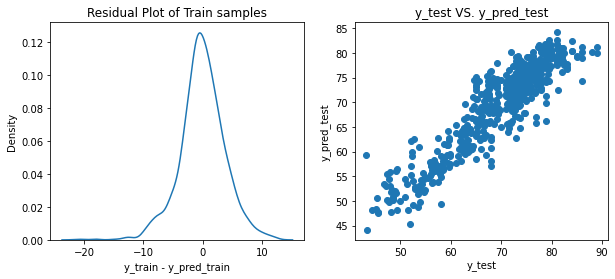

training score: 0.8419232544994265
testing score= 0.8376052746218977
Diff between train-test: 0.004317979877528799


In [41]:
lin_r_train, lin_r_test = fit_predict_score(models['lin_reg'], params['lin_reg'])

2. KNN

Loading a model from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


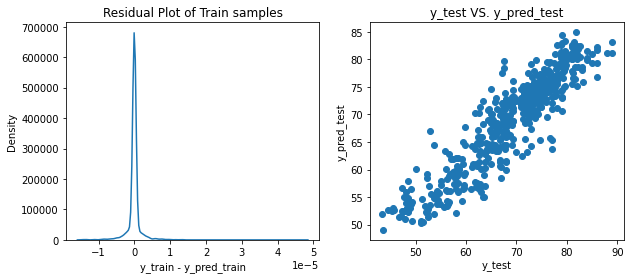

training score: 0.9999999999999463
testing score= 0.845104477348563
Diff between train-test: 0.1548955226513833


In [38]:
knn_r_train, knn_r_test = fit_predict_score(models['knn_reg'], params['knn_reg'])

3. SVR

4. Decision Trees

Loading a model from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


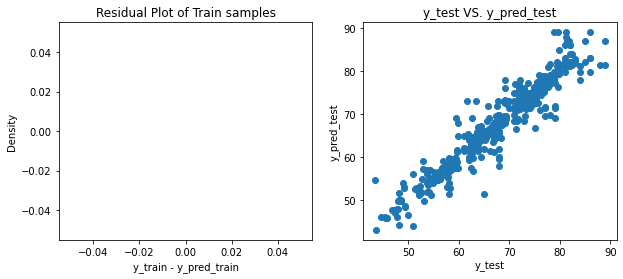

training score: 1.0
testing score= 0.9209548392822815
Diff between train-test: 0.0790451607177185


In [225]:
dt_r_train, dt_r_test = fit_predict_score(models['dt_reg'], params['dt_reg'])

5. Gradient Boosting

Hyper Parameters Tuning: \
['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start']

Loading a model from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


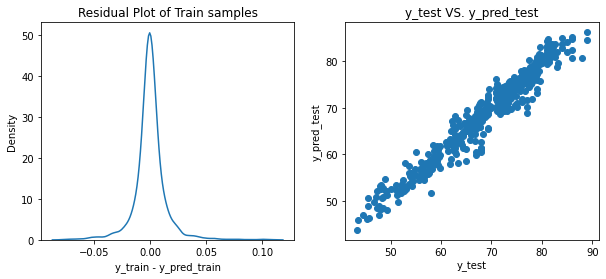

training score: 0.9999976210015881
testing score= 0.9516154101146981
Diff between train-test: 0.04838221088688999


In [224]:
gb_r_train, gb_r_test = fit_predict_score(models['gb_reg'], params['gb_reg'])

6. Extra Trees

Hyper parameters tuning: \
['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples',  'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

Loading a model from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


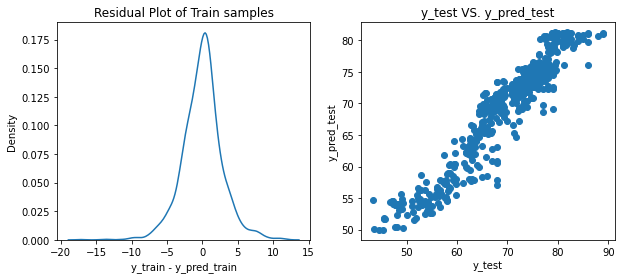

training score: 0.9134724548147035
testing score= 0.9037945368140103
Diff between train-test: 0.009677918000693175


In [223]:
xtree_r_train, xtree_r_test = fit_predict_score(models['xtree_reg'], params['xtree_reg'])

7. LightLGBM

Loading a model from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


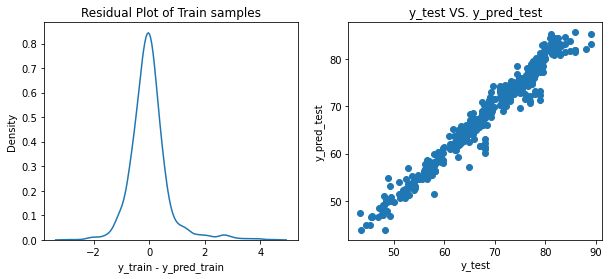

training score: 0.9945773377059212
testing score= 0.9639582825249339
Diff between train-test: 0.030619055180987287


In [222]:
lgb_r_train, lgb_r_test = fit_predict_score(models['lgb_reg'], params['lgb_reg'])

8. XGBoost

Loading a model from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file .sav


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


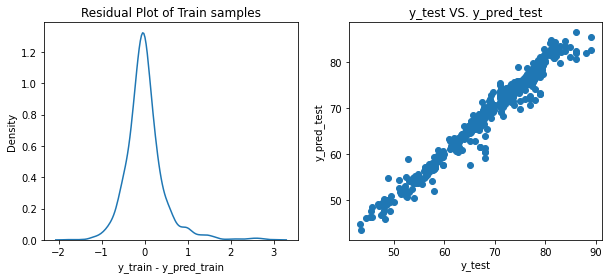

training score: 0.9977314249974464
testing score= 0.9639478827776783
Diff between train-test: 0.03378354221976809


In [220]:
xgb_r_train, xgb_r_test = fit_predict_score(models['xgb_reg'], params['xgb_reg'])

9.CatBoost

In [183]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [170]:
cat_reg = CatBoostRegressor(task_type='GPU', 
                            loss_function='RMSE', 
                            random_state=10,
                            verbose = 0
                           )
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.01, 0.01, 0.03],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
cat_reg.grid_search(grid, train_dataset)


bestTest = 25.748696
bestIteration = 99
0:	loss: 25.7486960	best: 25.7486960 (0)	total: 1.28s	remaining: 2m 16s
bestTest = 25.748696
bestIteration = 99
1:	loss: 25.7486960	best: 25.7486960 (0)	total: 2.34s	remaining: 2m 4s
bestTest = 4.592099682
bestIteration = 99
2:	loss: 4.5920997	best: 4.5920997 (2)	total: 3.45s	remaining: 2m
bestTest = 25.79054982
bestIteration = 99
3:	loss: 25.7905498	best: 4.5920997 (2)	total: 4.62s	remaining: 2m
bestTest = 25.79054982
bestIteration = 99
4:	loss: 25.7905498	best: 4.5920997 (2)	total: 5.71s	remaining: 1m 57s
bestTest = 4.599749122
bestIteration = 99
5:	loss: 4.5997491	best: 4.5920997 (2)	total: 6.8s	remaining: 1m 55s
bestTest = 25.83079918
bestIteration = 99
6:	loss: 25.8307992	best: 4.5920997 (2)	total: 7.88s	remaining: 1m 53s
bestTest = 25.83079918
bestIteration = 99
7:	loss: 25.8307992	best: 4.5920997 (2)	total: 9s	remaining: 1m 52s
bestTest = 4.637370021
bestIteration = 99
8:	loss: 4.6373700	best: 4.5920997 (2)	total: 10.2s	remaining: 1m 51s
b

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.03,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [171]:
save_model(cat_reg)

In [204]:
y_pred_test = cat_reg.predict(X_test)
y_pred_train = cat_reg.predict(X_train)
cat_r_test = r2_score(y_pred_test, y_test)
cat_r_train = r2_score(y_pred_train, y_train)

c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


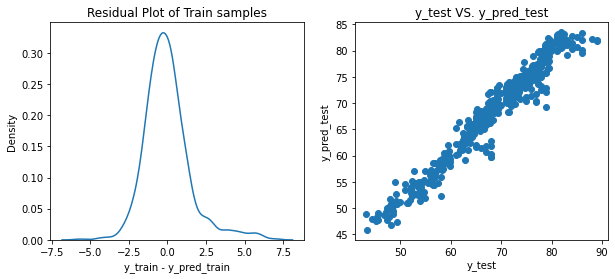

In [173]:
residuale(y_pred_train, y_pred_test)

10. Stacking

In [199]:
estimators = [
    ('xgb', load_pickle(str(models['xgb_reg']()).split('(')[0])),
    ('cat', cat_reg),
    ('lgb', load_pickle(str(models['lgb_reg']()).split('(')[0])),
    ('xtree', load_pickle(str(models['xtree_reg']()).split('(')[0])),
    ('gboost', load_pickle(str(models['gb_reg']()).split('(')[0])),
    ('dtree', load_pickle(str(models['dt_reg']()).split('(')[0])),
    ('knn', load_pickle(str(models['knn_reg']()).split('(')[0]))
    ]
    

In [200]:
stac_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stac_reg.fit(X_train,y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_bin=256,
                                            max_ca...
                               ExtraTreesRegressor(max_leaf_nodes=20,
                                                   n_estimators=500, n_jobs=-1,
                                                   random_state=100)),
                              ('gboost',
                               GradientBoostingRegressor(max_depth=8,
                                                         max_features=1,
                                                         max_leaf_nodes=40,
                                                         min_samples_leaf=7,
                                                         min_samples_split=3,
                                                         n_estimators=2000)),
                              ('dtree', DecisionTreeRegressor()),
                              ('knn',
                               KNeighborsRegressor(n_neighbors=6,
                                                   weights='distance'))],
                  final_estimator=LinearRegression())

In [250]:
y_pred_test = stac_reg.predict(X_test)
y_pred_train = stac_reg.predict(X_train)

In [251]:
stack_r_test = r2_score(y_test,y_pred_test)
stack_r_train = r2_score(y_train,y_pred_train)

In [252]:
results = {
    'xgb': {'r_train': xgb_r_train, 'r_test': xgb_r_test},
    'cat': {'r_train': cat_r_train, 'r_test': cat_r_test},
    'lgb': {'r_train': lgb_r_train, 'r_test': lgb_r_test},
    'xtree': {'r_train': xtree_r_train, 'r_test': xtree_r_test},
    'gboost': {'r_train': gb_r_train, 'r_test': gb_r_test},
    'dtree': {'r_train': dt_r_train, 'r_test': dt_r_test},
    'knn': {'r_train': knn_r_train, 'r_test': knn_r_test},
    'linear': {'r_train': lin_r_train, 'r_test': lin_r_test},
    'stack':{'r_train': stack_r_train, 'r_test': stack_r_test}
}

In [253]:
score_df = pd.DataFrame.from_dict(results, orient='index', columns=['r_train', 'r_test'])
score_df.head(10)

r_train    r_test
xgb     0.997731  0.963948
cat     0.972756  0.948140
lgb     0.994577  0.963958
xtree   0.913472  0.903795
gboost  0.999998  0.951615
dtree   1.000000  0.920955
knn     1.000000  0.845104
linear  0.841923  0.837605
stack   0.998452  0.967500

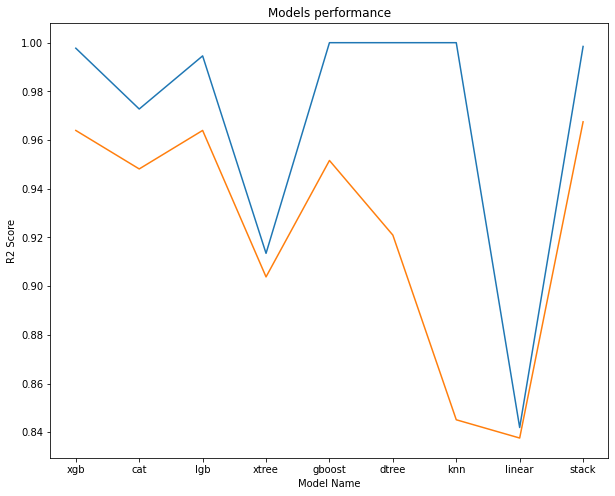

In [259]:
plt.figure(figsize=(10,8))
plt.plot(score_df)
plt.title('Models performance')
plt.xlabel('Model Name')
plt.ylabel('R2 Score');